In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
!pip install -Uqq fastbook

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab-git 0.11.0 requires nbdime<2.0.0,>=1.1.0, but you have nbdime 2.1.0 which is incompatible.


In [6]:
import fastbook
fastbook.setup_book()

In [7]:
from fastai.vision.all import *

In [8]:
path = untar_data(URLs.PETS)
path

Path('/root/.fastai/data/oxford-iiit-pet')

In [11]:
!ls $path/'images'

Abyssinian_1.jpg		   english_cocker_spaniel_184.jpg
Abyssinian_10.jpg		   english_cocker_spaniel_185.jpg
Abyssinian_100.jpg		   english_cocker_spaniel_186.jpg
Abyssinian_100.mat		   english_cocker_spaniel_187.jpg
Abyssinian_101.jpg		   english_cocker_spaniel_188.jpg
Abyssinian_101.mat		   english_cocker_spaniel_189.jpg
Abyssinian_102.jpg		   english_cocker_spaniel_19.jpg
Abyssinian_102.mat		   english_cocker_spaniel_190.jpg
Abyssinian_103.jpg		   english_cocker_spaniel_191.jpg
Abyssinian_104.jpg		   english_cocker_spaniel_192.jpg
Abyssinian_105.jpg		   english_cocker_spaniel_193.jpg
Abyssinian_106.jpg		   english_cocker_spaniel_194.jpg
Abyssinian_107.jpg		   english_cocker_spaniel_195.jpg
Abyssinian_108.jpg		   english_cocker_spaniel_196.jpg
Abyssinian_109.jpg		   english_cocker_spaniel_197.jpg
Abyssinian_11.jpg		   english_cocker_spaniel_198.jpg
Abyssinian_110.jpg		   english_cocker_spaniel_199.jpg
Abyssinian_111.jpg		   english_cocker_spaniel_2.jpg
Abyssinian_112.jpg		   english_cock

In [12]:
files = get_image_files(path)

In [69]:
files[0]

Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_115.jpg')

In [42]:
RandomSplitter??#return a fucntion that returns indexes

Signature: RandomSplitter(valid_pct=0.2, seed=None)
Source:   
def RandomSplitter(valid_pct=0.2, seed=None):
    "Create function that splits `items` between train/val with `valid_pct` randomly."
    def _inner(o):
        if seed is not None: torch.manual_seed(seed)
        rand_idx = L(list(torch.randperm(len(o)).numpy()))
        cut = int(valid_pct * len(o))
        return rand_idx[cut:],rand_idx[:cut]
    return _inner
File:      /opt/conda/lib/python3.7/site-packages/fastai/data/transforms.py
Type:      function


In [44]:
train,val = RandomSplitter()(files)

In [45]:
train

(#11824) [12087,10663,10637,12743,6475,12652,2407,13543,1050,11038...]

In [46]:
val

(#2956) [7052,57,2251,10681,3816,6958,4351,8300,2034,6243...]

In [55]:
dblock = DataBlock(blocks = (ImageBlock,CategoryBlock),
                   get_items=get_image_files,
                   get_y = lambda x:x.name[0].isupper(),
                   splitter = RandomSplitter(),
                   item_tfms = Resize(224)
                  )

In [14]:
DataBlock??

Init signature:
DataBlock(
    blocks=None,
    dl_type=None,
    getters=None,
    n_inp=None,
    item_tfms=None,
    batch_tfms=None,
    *,
    get_items=None,
    splitter=None,
    get_y=None,
    get_x=None,
)
Source:        
class DataBlock():
    "Generic container to quickly build `Datasets` and `DataLoaders`"
    get_x=get_items=splitter=get_y = None
    blocks,dl_type = (TransformBlock,TransformBlock),TfmdDL
    _methods = 'get_items splitter get_y get_x'.split()
    _msg = "If you wanted to compose several transforms in your getter don't forget to wrap them in a `Pipeline`."
    def __init__(self, blocks=None, dl_type=None, getters=None, n_inp=None, item_tfms=None, batch_tfms=None, **kwargs):
        blocks = L(self.blocks if blocks is None else blocks)
        blocks = L(b() if callable(b) else b for b in blocks)
        self.type_tfms = blocks.attrgot('type_tfms', L())
        self.default_item_tfms  = _merge_tfms(*blocks.attrgot('item_tfms',  L()))
        self.default_

In [48]:
dsets = dblock.datasets(path)

In [73]:
dls = dblock.dataloaders(path)

In [74]:
dls

In [75]:
xb,yb = dls.one_batch()

In [76]:
xb.shape

(64, 3, 224, 224)

In [77]:
yb.shape

(64,)

In [19]:
type(dsets)

fastai.data.core.Datasets

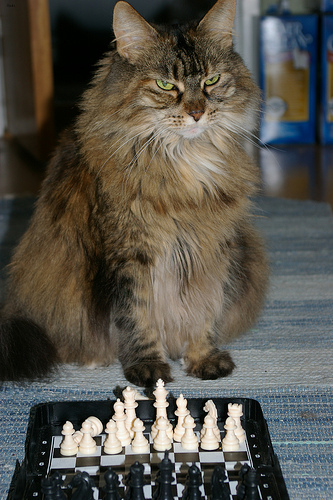

In [49]:
dsets[2][0]

In [38]:
dsets[2]

(PILImage mode=RGB size=333x500, TensorCategory(1))

In [50]:
dsets.train

(#11824) [(PILImage mode=RGB size=400x500, TensorCategory(0)),(PILImage mode=RGB size=500x375, TensorCategory(0)),(PILImage mode=RGB size=375x500, TensorCategory(0)),(PILImage mode=RGB size=375x500, TensorCategory(1)),(PILImage mode=RGB size=500x333, TensorCategory(0)),(PILImage mode=RGB size=233x350, TensorCategory(1)),(PILImage mode=RGB size=500x333, TensorCategory(0)),(PILImage mode=RGB size=375x500, TensorCategory(0)),(PILImage mode=RGB size=500x375, TensorCategory(0)),(PILImage mode=RGB size=200x150, TensorCategory(1))...]

In [51]:
dsets.valid

(#2956) [(PILImage mode=RGB size=500x334, TensorCategory(0)),(PILImage mode=RGB size=500x375, TensorCategory(0)),(PILImage mode=RGB size=500x334, TensorCategory(1)),(PILImage mode=RGB size=500x372, TensorCategory(1)),(PILImage mode=RGB size=500x333, TensorCategory(0)),(PILImage mode=RGB size=500x492, TensorCategory(0)),(PILImage mode=RGB size=500x375, TensorCategory(0)),(PILImage mode=RGB size=333x500, TensorCategory(0)),(PILImage mode=RGB size=500x375, TensorCategory(0)),(PILImage mode=RGB size=500x334, TensorCategory(1))...]

In [56]:
dblock.summary(path)

Setting-up type transforms pipelines
Found 14780 items
2 datasets of sizes 11824,2956
Setting up Pipeline: PILBase.create
Setting up Pipeline: <lambda> -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/annotations/trimaps/Siamese_228.png
    applying PILBase.create gives
      PILImage mode=RGB size=257x300
  Pipeline: <lambda> -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/annotations/trimaps/Siamese_228.png
    applying <lambda> gives
      True
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(1)

Final sample: (PILImage mode=RGB size=257x300, TensorCategory(1))


Found 14780 items
2 datasets of sizes 11824,2956
Setting up Pipeline: PILBase.create
Setting up Pipeline: <lambda> -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

In [63]:
ImageBlock??

Signature: ImageBlock(cls=<class 'fastai.vision.core.PILImage'>)
Source:   
def ImageBlock(cls=PILImage):
    "A `TransformBlock` for images of `cls`"
    return TransformBlock(type_tfms=cls.create, batch_tfms=IntToFloatTensor)
File:      /opt/conda/lib/python3.7/site-packages/fastai/vision/data.py
Type:      function


In [64]:
# passes specific arguments to TransformationBlock

In [59]:
TransformBlock??

Init signature:
TransformBlock(
    type_tfms=None,
    item_tfms=None,
    batch_tfms=None,
    dl_type=None,
    dls_kwargs=None,
)
Source:        
class TransformBlock():
    "A basic wrapper that links defaults transforms for the data block API"
    def __init__(self, type_tfms=None, item_tfms=None, batch_tfms=None, dl_type=None, dls_kwargs=None):
        self.type_tfms  =            L(type_tfms)
        self.item_tfms  = ToTensor + L(item_tfms)
        self.batch_tfms =            L(batch_tfms)
        self.dl_type,self.dls_kwargs = dl_type,({} if dls_kwargs is None else dls_kwargs)
File:           /opt/conda/lib/python3.7/site-packages/fastai/data/block.py
Type:           type
Subclasses:     


In [65]:
imb = ImageBlock()

In [66]:
imb.type_tfms

(#1) [<bound method PILBase.create of <class 'fastai.vision.core.PILImage'>>]

In [67]:
imb.type_tfms[0]

<bound method PILBase.create of <class 'fastai.vision.core.PILImage'>>

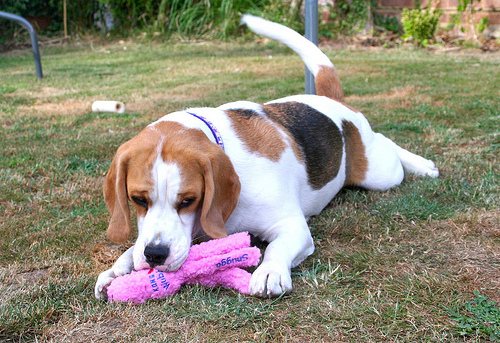

In [70]:
imb.type_tfms[0](files[0])

In [71]:
??CategoryBlock

Signature: CategoryBlock(vocab=None, sort=True, add_na=False)
Source:   
def CategoryBlock(vocab=None, sort=True, add_na=False):
    "`TransformBlock` for single-label categorical targets"
    return TransformBlock(type_tfms=Categorize(vocab=vocab, sort=sort, add_na=add_na))
File:      /opt/conda/lib/python3.7/site-packages/fastai/data/block.py
Type:      function


In [72]:
Categorize??

Init signature: Categorize(self, vocab=None, sort=True, add_na=False)
Source:        
class Categorize(DisplayedTransform):
    "Reversible transform of category string to `vocab` id"
    loss_func,order=CrossEntropyLossFlat(),1
    def __init__(self, vocab=None, sort=True, add_na=False):
        if vocab is not None: vocab = CategoryMap(vocab, sort=sort, add_na=add_na)
        store_attr()

    def setups(self, dsets):
        if self.vocab is None and dsets is not None: self.vocab = CategoryMap(dsets, sort=self.sort, add_na=self.add_na)
        self.c = len(self.vocab)

    def encodes(self, o):
        try:
            return TensorCategory(self.vocab.o2i[o])
        except KeyError as e:
            raise KeyError(f"Label '{o}' was not included in the training dataset") from e
    def decodes(self, o): return Category      (self.vocab    [o])
File:           /opt/conda/lib/python3.7/site-packages/fastai/data/transforms.py
Type:           _TfmMeta
Subclasses:     MultiCategorize, En